In [1]:
import json
import numpy as np
import pandas as pd

In [2]:
data = json.load(open("labeled.json"))

## json structure

In [4]:
# with no annotation of sentiment
data[0]["data"]

{'_id': '6655d3d577b7d3f1f5527c38',
 'recommendationid': 166210298,
 'author.steamid': 76561199567325072,
 'author.num_games_owned': 0,
 'author.num_reviews': 2,
 'author.playtime_forever': 4911,
 'author.playtime_last_two_weeks': 0,
 'author.playtime_at_review': 4911,
 'author.last_played': '2024-04-17T08:07:22.000Z',
 'language': 'english',
 'review': "10/10 game , i have more than 3000 hours on my other account, sadly this game was ruined by hackers, started to think valve doesn't want to develop there anticheats because hackers are the most people spending money in this game, because each hacker has like 10 accounts and i bet you if you go to premier rating 90% if not 99% are hackers on that list. \\nif you want to enjoy this game now days you have to get yourself a hack or don't play it.\\n",
 'timestamp_created': '2024-05-28T10:30:27.000Z',
 'timestamp_updated': '2024-05-28T10:30:27.000Z',
 'voted_up': False,
 'votes_up': 0,
 'votes_funny': 0,
 'weighted_vote_score': 0.0,
 'comme

In [5]:
# with annotation of sentiment
data[2]["data"]

{'_id': '6655d3d577b7d3f1f5527c40',
 'recommendationid': 166207499,
 'author.steamid': 76561197960586400,
 'author.num_games_owned': 0,
 'author.num_reviews': 2,
 'author.playtime_forever': 93471,
 'author.playtime_last_two_weeks': 1402,
 'author.playtime_at_review': 93404,
 'author.last_played': '2024-05-28T10:05:38.000Z',
 'language': 'english',
 'review': 'Love CS, been playing it for 20 years now. The only thing I wish happened was that trolls, toxic people, cheaters and smurfs were more heavily regulated.',
 'timestamp_created': '2024-05-28T08:59:29.000Z',
 'timestamp_updated': '2024-05-28T08:59:29.000Z',
 'voted_up': True,
 'votes_up': 0,
 'votes_funny': 0,
 'weighted_vote_score': 0.0,
 'comment_count': 0,
 'steam_purchase': True,
 'received_for_free': False,
 'written_during_early_access': False,
 'hidden_in_steam_china': True,
 'steam_china_location': ''}

## tabulating the json into dataframe

In [7]:
data_reviews = []
labels = []

for i in range(len(data)):
    review = data[i]["data"]["review"]
    data_reviews.append(review)
    try: 
        label = data[i]["annotations"][0]["result"][0]["value"]["choices"][0]
        labels.append(label)
    except:
        labels.append(None)

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

In [9]:
dicts = {"reviews": data_reviews,
         "labels": labels
        }

In [10]:
dataset = pd.DataFrame(dicts)
dataset.head()

,reviews,labels
0,"10/10 game , i have more than 3000 hours on my other account, sadly this game was ruined by hackers, started to think valve doesn't want to develop there anticheats because hackers are the most people spending money in this game, because each hacker has like 10 accounts and i bet you if you go to premier rating 90% if not 99% are hackers on that list. \nif you want to enjoy this game now days you have to get yourself a hack or don't play it.\n",None
1,Terrible Game. Servers are always laggy and more cheaters than a Pool hall,Negative
2,"Love CS, been playing it for 20 years now. The only thing I wish happened was that trolls, toxic people, cheaters and smurfs were more heavily regulated.",Negative
3,POV: you just got yelled at in russian and now that guy is one of you best mates,None
4,One of the nostalgic games of all time.,Positive


## EDA

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1508 non-null   object
 1   labels   1005 non-null   object
dtypes: object(2)
memory usage: 23.7+ KB


In [13]:
dataset.describe()

,reviews,labels
count,1508,1005
unique,1503,2
top,Dust 2 is in the game.,Positive
freq,3,503


In [14]:
dataset[dataset.duplicated(keep=False)]

,reviews,labels
508,You'll find less cheaters on Tinder,Negative
942,You'll find less cheaters on Tinder,Negative
980,"After 2 years playing it, I didn't improve my skills in-game.\n\nHowever, I learned new language skills: now I can curse in Russian and Brazilian Portuguese.\n\nAlso, my tolerance level to guttural screams and loud sounds was increased.\n\nNow I can bear the crying of my children for longer and I can make them feel better by singing sweet traditional songs from other cultures, such as Очи чёрные (Dark Eyes) or Garota de Ipanema (The Girl from Ipanema).\n\nIn conclusion, Counter Strike transformed me into a better father and a better person, in addition to making me more patient, tolerant to hateful people and more trained in languages and cultures.\n\nBetter than any psychiatric therapy. 10/10",Positive
1148,i am so bad at this game,None
1149,i am so bad at this game,None
1398,Dust 2 is in the game.,None
1400,Dust 2 is in the game.,None
1401,Dust 2 is in the game.,None
1414,"After 2 years playing it, I didn't improve my skills in-game.\n\nHowever, I learned new language skills: now I can curse in Russian and Brazilian Portuguese.\n\nAlso, my tolerance level to guttural screams and loud sounds was increased.\n\nNow I can bear the crying of my children for longer and I can make them feel better by singing sweet traditional songs from other cultures, such as Очи чёрные (Dark Eyes) or Garota de Ipanema (The Girl from Ipanema).\n\nIn conclusion, Counter Strike transformed me into a better father and a better person, in addition to making me more patient, tolerant to hateful people and more trained in languages and cultures.\n\nBetter than any psychiatric therapy. 10/10",Positive


In [15]:
dataset.duplicated().sum()

5

In [16]:
dataset.isnull().sum()

reviews      0
labels     503
dtype: int64

In [17]:
dataset.query("labels == 'Positive'").count().labels

503

In [18]:
dataset.query("labels == 'Negative'").count().labels

502

## pre-process

In [20]:
dataset.dropna(inplace=True)

In [21]:
dataset = dataset.drop_duplicates(keep="first")

In [22]:
dataset.describe()

,reviews,labels
count,1003,1003
unique,1003,2
top,Terrible Game. Servers are always laggy and more cheaters than a Pool hall,Positive
freq,1,502


In [23]:
dataset = dataset.reset_index()
dataset.drop(columns=["index"],inplace= True)

In [24]:
dataset.sample(10, random_state=10)

,reviews,labels
230,The game is fun. However there can be players who take it too seriously. They lack consideration for beginners.,Positive
491,Russians are really nice in this game. 👍,Positive
235,From the May 23rd 2024 Update:\n\n[ CHICKENS ]\nChickens have a few new animations\nChickens can now walk up hills\nChickens can now turn right while walking\n\nValve added a fucking chicken update before they added a functioning Anti-Cheat. I can't even make this shit up.,Negative
706,Step 1: install the game\nStep 2: Start a game\nStep 3: lose the game\nStep 4: uninstall the game\nStep 5: repeat step 1\nStep 6: asking for the meaning of life,Negative
280,Best game i played yet good job steam!,Positive
609,this is best game in the steam communty,Positive
604,I have never written a review after playing 3 premier matches and having cheaters in every single game I will never install it again and advise people against it.,Negative
11,very good point and click adventure,Positive
900,This game makes me want to rip the skin off of a living human and slap it on an Ak-47 for a free cool skin,Negative
768,This game is so fun with friends,Positive


## text pre-process and normalization

In [26]:
uniqueWords = list(set(" ".join(dataset['reviews']).split(" ")))
count = len(uniqueWords)
count

4877

## removing emoji

In [28]:
import re

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [29]:
no_emoji = []
for i in range(len(dataset)):
    clean_emoji = remove_emojis(dataset.reviews[i])
    no_emoji.append(clean_emoji)

dataset.insert(1, "no_emoji", no_emoji, True)

In [30]:
dataset.sample(10)

,reviews,no_emoji,labels
518,The best game ever made in the history of ever,The best game ever made in the history of ever,Positive
631,vac hasnt been able to verify my game files for years. fix this broken game,vac hasnt been able to verify my game files for years. fix this broken game,Negative
102,My friend just made a review after I beat him in a private match and made him rage quit....I recommend to everyone!,My friend just made a review after I beat him in a private match and made him rage quit....I recommend to everyone!,Positive
209,valve you suck at optimization and your vac sucks ass,valve you suck at optimization and your vac sucks ass,Negative
94,Shit game! always like a five stack in enemy team cheating,Shit game! always like a five stack in enemy team cheating,Negative
497,"Hello Valve,\n\nThere are a lot of players with recent profile created that are cheating ( find a workaround for people who are making new accounts only to cheat not risking anything but an e-mail at most ) - maybe you will improve your VAC system. I mean.. it is impossible to play at this time, everything is pretty cool, skins, functionality etc but dude ..at least bring some admins who can stay spectators in games if your system is not capable of protecting the legit and correct players.\nAlways cheaters with AIM and WALL and you don't do nothing about it.. totally disappointed until your fix..","Hello Valve,\n\nThere are a lot of players with recent profile created that are cheating ( find a workaround for people who are making new accounts only to cheat not risking anything but an e-mail at most ) - maybe you will improve your VAC system. I mean.. it is impossible to play at this time, everything is pretty cool, skins, functionality etc but dude ..at least bring some admins who can stay spectators in games if your system is not capable of protecting the legit and correct players.\nAlways cheaters with AIM and WALL and you don't do nothing about it.. totally disappointed until your fix..",Negative
494,"WORST GAME EVER CREATED. PLEASE NEVER PLAY THIS GAME. \nUpdate: play this game and learn how to strafe, played for 1.5k hours and just now figured out u could strafe.","WORST GAME EVER CREATED. PLEASE NEVER PLAY THIS GAME. \nUpdate: play this game and learn how to strafe, played for 1.5k hours and just now figured out u could strafe.",Negative
851,"CS2 is the epitome of 'verschlimmbessern', literally nothing improved except the Smokes.\nOn the contrary, at least the Quickchat and the Buy menu got worse and Skins are 3x what they were a few years ago...","CS2 is the epitome of 'verschlimmbessern', literally nothing improved except the Smokes.\nOn the contrary, at least the Quickchat and the Buy menu got worse and Skins are 3x what they were a few years ago...",Negative
247,I have a skin addiction.... games kewl too,I have a skin addiction.... games kewl too,Positive
659,i am missing csgo normal\r\n,i am missing csgo normal\r\n,Negative


## removing punctuation

In [32]:
import re
import string

In [33]:
def remove_custom_punctuation(text, exclude=''):
    punctuation_to_remove = ''.join([char for char in string.punctuation if char not in exclude])
    return re.sub(f'[{re.escape(punctuation_to_remove)}]', '', text)

In [34]:
no_ascii = []
for i in range(len(dataset)):
    clean_ascii = remove_custom_punctuation(dataset.no_emoji[i].lower() ,exclude='/')
    no_ascii.append(clean_ascii)

dataset.insert(2, "no_punc", no_ascii, True)

In [35]:
dataset.head(10)

,reviews,no_emoji,no_punc,labels
0,Terrible Game. Servers are always laggy and more cheaters than a Pool hall,Terrible Game. Servers are always laggy and more cheaters than a Pool hall,terrible game servers are always laggy and more cheaters than a pool hall,Negative
1,"Love CS, been playing it for 20 years now. The only thing I wish happened was that trolls, toxic people, cheaters and smurfs were more heavily regulated.","Love CS, been playing it for 20 years now. The only thing I wish happened was that trolls, toxic people, cheaters and smurfs were more heavily regulated.",love cs been playing it for 20 years now the only thing i wish happened was that trolls toxic people cheaters and smurfs were more heavily regulated,Negative
2,One of the nostalgic games of all time.,One of the nostalgic games of all time.,one of the nostalgic games of all time,Positive
3,best game headshot pew pew,best game headshot pew pew,best game headshot pew pew,Positive
4,"This is a very good game, i love it!","This is a very good game, i love it!",this is a very good game i love it,Positive
5,9/10 fun wish i could aim,9/10 fun wish i could aim,9/10 fun wish i could aim,Positive
6,thank for disable competitive 30 min(failed to connect to the match) bc this stp game crash just when match start.,thank for disable competitive 30 min(failed to connect to the match) bc this stp game crash just when match start.,thank for disable competitive 30 minfailed to connect to the match bc this stp game crash just when match start,Negative
7,good game to have fun\r\n,good game to have fun\r\n,good game to have funrn,Positive
8,"Too many hackers and cringe people play this game. Spare yourself the trouble, Valve anti cheat doesn't care about legit cheaters.","Too many hackers and cringe people play this game. Spare yourself the trouble, Valve anti cheat doesn't care about legit cheaters.",too many hackers and cringe people play this game spare yourself the trouble valve anti cheat doesnt care about legit cheaters,Negative
9,"pls fix this shit game. and its hit detection, wierd and wacky gun spray patterns, and cheaters. thanks valve and your shit copoy\n","pls fix this shit game. and its hit detection, wierd and wacky gun spray patterns, and cheaters. thanks valve and your shit copoy\n",pls fix this shit game and its hit detection wierd and wacky gun spray patterns and cheaters thanks valve and your shit copoyn,Negative


In [36]:
uniqueWords2 = list(set(" ".join(dataset['no_punc']).split(" ")))
count2 = len(uniqueWords2)
count2

3350

In [37]:
from num2words import num2words
from nltk.tokenize import sent_tokenize, word_tokenize 

In [38]:
def convert_digits_to_words(text):
    words = text.split()
    converted_words = [num2words(word) if word.isdigit() else word for word in words]
    converted_text = ' '.join(converted_words)
    return converted_text

In [39]:
numtoword = []
for i in range(len(dataset)):
    numtow = convert_digits_to_words(dataset.no_punc[i])
    numtoword.append(numtow)
    
dataset.insert(3, "no_digit", numtoword, True)

In [40]:
dataset.sample(10, random_state=10)

,reviews,no_emoji,no_punc,no_digit,labels
230,The game is fun. However there can be players who take it too seriously. They lack consideration for beginners.,The game is fun. However there can be players who take it too seriously. They lack consideration for beginners.,the game is fun however there can be players who take it too seriously they lack consideration for beginners,the game is fun however there can be players who take it too seriously they lack consideration for beginners,Positive
491,Russians are really nice in this game. 👍,Russians are really nice in this game.,russians are really nice in this game,russians are really nice in this game,Positive
235,From the May 23rd 2024 Update:\n\n[ CHICKENS ]\nChickens have a few new animations\nChickens can now walk up hills\nChickens can now turn right while walking\n\nValve added a fucking chicken update before they added a functioning Anti-Cheat. I can't even make this shit up.,From the May 23rd 2024 Update:\n\n[ CHICKENS ]\nChickens have a few new animations\nChickens can now walk up hills\nChickens can now turn right while walking\n\nValve added a fucking chicken update before they added a functioning Anti-Cheat. I can't even make this shit up.,from the may 23rd 2024 updatenn chickens nchickens have a few new animationsnchickens can now walk up hillsnchickens can now turn right while walkingnnvalve added a fucking chicken update before they added a functioning anticheat i cant even make this shit up,from the may 23rd two thousand and twenty-four updatenn chickens nchickens have a few new animationsnchickens can now walk up hillsnchickens can now turn right while walkingnnvalve added a fucking chicken update before they added a functioning anticheat i cant even make this shit up,Negative
706,Step 1: install the game\nStep 2: Start a game\nStep 3: lose the game\nStep 4: uninstall the game\nStep 5: repeat step 1\nStep 6: asking for the meaning of life,Step 1: install the game\nStep 2: Start a game\nStep 3: lose the game\nStep 4: uninstall the game\nStep 5: repeat step 1\nStep 6: asking for the meaning of life,step 1 install the gamenstep 2 start a gamenstep 3 lose the gamenstep 4 uninstall the gamenstep 5 repeat step 1nstep 6 asking for the meaning of life,step one install the gamenstep two start a gamenstep three lose the gamenstep four uninstall the gamenstep five repeat step 1nstep six asking for the meaning of life,Negative
280,Best game i played yet good job steam!,Best game i played yet good job steam!,best game i played yet good job steam,best game i played yet good job steam,Positive
609,this is best game in the steam communty,this is best game in the steam communty,this is best game in the steam communty,this is best game in the steam communty,Positive
604,I have never written a review after playing 3 premier matches and having cheaters in every single game I will never install it again and advise people against it.,I have never written a review after playing 3 premier matches and having cheaters in every single game I will never install it again and advise people against it.,i have never written a review after playing 3 premier matches and having cheaters in every single game i will never install it again and advise people against it,i have never written a review after playing three premier matches and having cheaters in every single game i will never install it again and advise people against it,Negative
11,very good point and click adventure,very good point and click adventure,very good point and click adventure,very good point and click adventure,Positive
900,This game makes me want to rip the skin off of a living human and slap it on an Ak-47 for a free cool skin,This game makes me want to rip the skin off of a living human and slap it on an Ak-47 for a free cool skin,this game makes me want to rip the skin off of a living human and slap it on an ak47 for a free cool skin,this game makes me want to rip the skin off of a living human and slap it on an ak47 for a 

In [41]:
import nltk
from nltk.corpus import wordnet

In [42]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bagussatya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
cs2_terms = [
    "ace", "clutch", "eco", "force buy", "full buy", "save", "pick", "push",
    "rotate", "split", "rush", "awp", "ak-47", "m4a4", "m4a1-s", "deagle",
    "kevlar", "helmet", "utility", "site", "ct spawn", "t spawn", "connector",
    "mid", "boost", "ninja", "strat", "callout", "fake", "trade", "entry fragger",
    "support", "lurk", "in-game leader", "igl", "best of three", "bo3", "overtime",
    "defuse", "plant", "ak47", "ct", "t"
]

In [44]:
def is_english_word(word):
    return bool(wordnet.synsets(word))

def filter_valid_words(words, special_terms):
    valid_words = []
    for word in words.split():
        clean_word = word.replace('-', '').replace(' ', '')
        if is_english_word(clean_word) or word in special_terms:
            valid_words.append(word)
    return valid_words

In [45]:
words_term = []
for i in range(len(dataset)):
    terms = filter_valid_words(dataset.no_digit[i], cs2_terms)
    words_term.append(' '.join(terms))
    
dataset.insert(4, "terms", words_term, True)

In [46]:
dataset.sample(10, random_state=45)

,reviews,no_emoji,no_punc,no_digit,terms,labels
52,"Best game, specially if ur a gorl, not sexest at all","Best game, specially if ur a gorl, not sexest at all",best game specially if ur a gorl not sexest at all,best game specially if ur a gorl not sexest at all,best game specially ur a not at all,Positive
154,Cheater issue seems to be resolved. That's all i cared about. ty valve.,Cheater issue seems to be resolved. That's all i cared about. ty valve.,cheater issue seems to be resolved thats all i cared about ty valve,cheater issue seems to be resolved thats all i cared about ty valve,cheater issue seems be resolved all i cared about valve,Positive
661,valve pls update anti cheat and ban these players,valve pls update anti cheat and ban these players,valve pls update anti cheat and ban these players,valve pls update anti cheat and ban these players,valve update anti cheat ban players,Negative
911,this game took over my life. dont play it,this game took over my life. dont play it,this game took over my life dont play it,this game took over my life dont play it,game took over life play it,Negative
476,This game is dangerous for the health and safety of my friends and those around them,This game is dangerous for the health and safety of my friends and those around them,this game is dangerous for the health and safety of my friends and those around them,this game is dangerous for the health and safety of my friends and those around them,game is dangerous health safety friends around,Negative
813,"Even though i suck ass, its pretty fun and i make money as well","Even though i suck ass, its pretty fun and i make money as well",even though i suck ass its pretty fun and i make money as well,even though i suck ass its pretty fun and i make money as well,even though i suck ass its pretty fun i make money as well,Positive
922,"Cheaters Everywhere, don't play if you wanna have fun","Cheaters Everywhere, don't play if you wanna have fun",cheaters everywhere dont play if you wanna have fun,cheaters everywhere dont play if you wanna have fun,cheaters everywhere play have fun,Negative
342,"dont play, my friend is a case gambler","dont play, my friend is a case gambler",dont play my friend is a case gambler,dont play my friend is a case gambler,play friend is a case gambler,Negative
498,im going to kill myself in game\r\n,im going to kill myself in game\r\n,im going to kill myself in gamern,im going to kill myself in gamern,going kill in,Negative
821,full of cheaters worst AC ever and trash matchmaking,full of cheaters worst AC ever and trash matchmaking,full of cheaters worst ac ever and trash matchmaking,full of cheaters worst ac ever and trash matchmaking,full cheaters worst ac ever trash matchmaking,Negative


In [47]:
uniqueWords3 = list(set(" ".join(dataset['terms']).split(" ")))
count3 = len(uniqueWords3)
count3

2410

In [48]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

In [49]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bagussatya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
stop_words = set(stopwords.words('english'))

important_stopwords = {"not", "don't", "didn't", "won't", "couldn't", "isn't", "wasn't", "aren't", "weren't", "wouldn't", "shouldn't", "can't", "cannot", "no", "never"}
custom_stop_words = stop_words - important_stopwords

def remove_stopwords(text, custom_stop_words):
    words = text.split()
    filtered_words = [word for word in words if word not in custom_stop_words]
    return ' '.join(filtered_words)

In [51]:
stopw = []
for i in range(len(dataset)):
    clean_stopw = remove_stopwords(dataset.terms[i], custom_stop_words)
    stopw.append(clean_stopw)
    
dataset.insert(5, "stopw", stopw, True)

In [52]:
dataset.sample(10, random_state=45)

,reviews,no_emoji,no_punc,no_digit,terms,stopw,labels
52,"Best game, specially if ur a gorl, not sexest at all","Best game, specially if ur a gorl, not sexest at all",best game specially if ur a gorl not sexest at all,best game specially if ur a gorl not sexest at all,best game specially ur a not at all,best game specially ur not,Positive
154,Cheater issue seems to be resolved. That's all i cared about. ty valve.,Cheater issue seems to be resolved. That's all i cared about. ty valve.,cheater issue seems to be resolved thats all i cared about ty valve,cheater issue seems to be resolved thats all i cared about ty valve,cheater issue seems be resolved all i cared about valve,cheater issue seems resolved cared valve,Positive
661,valve pls update anti cheat and ban these players,valve pls update anti cheat and ban these players,valve pls update anti cheat and ban these players,valve pls update anti cheat and ban these players,valve update anti cheat ban players,valve update anti cheat ban players,Negative
911,this game took over my life. dont play it,this game took over my life. dont play it,this game took over my life dont play it,this game took over my life dont play it,game took over life play it,game took life play,Negative
476,This game is dangerous for the health and safety of my friends and those around them,This game is dangerous for the health and safety of my friends and those around them,this game is dangerous for the health and safety of my friends and those around them,this game is dangerous for the health and safety of my friends and those around them,game is dangerous health safety friends around,game dangerous health safety friends around,Negative
813,"Even though i suck ass, its pretty fun and i make money as well","Even though i suck ass, its pretty fun and i make money as well",even though i suck ass its pretty fun and i make money as well,even though i suck ass its pretty fun and i make money as well,even though i suck ass its pretty fun i make money as well,even though suck ass pretty fun make money well,Positive
922,"Cheaters Everywhere, don't play if you wanna have fun","Cheaters Everywhere, don't play if you wanna have fun",cheaters everywhere dont play if you wanna have fun,cheaters everywhere dont play if you wanna have fun,cheaters everywhere play have fun,cheaters everywhere play fun,Negative
342,"dont play, my friend is a case gambler","dont play, my friend is a case gambler",dont play my friend is a case gambler,dont play my friend is a case gambler,play friend is a case gambler,play friend case gambler,Negative
498,im going to kill myself in game\r\n,im going to kill myself in game\r\n,im going to kill myself in gamern,im going to kill myself in gamern,going kill in,going kill,Negative
821,full of cheaters worst AC ever and trash matchmaking,full of cheaters worst AC ever and trash matchmaking,full of cheaters worst ac ever and trash matchmaking,full of cheaters worst ac ever and trash matchmaking,full cheaters worst ac ever trash matchmaking,full cheaters worst ac ever trash matchmaking,Negative


In [53]:
from nltk.tokenize import sent_tokenize, word_tokenize 

In [54]:
uniqueWord4 = list(set(" ".join(dataset['stopw']).split(" ")))
count4 = len(uniqueWord4)
count4

2334

In [55]:
import spacy

In [56]:
nlp = spacy.load("en_core_web_sm")

def lemmatize_text_spacy(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

In [57]:
lemmas = []
for i in range(len(dataset)):
    lemma = lemmatize_text_spacy(dataset.stopw[i])
    lemmas.append(lemma)
    
dataset.insert(6, "lemma", lemmas, True)

In [58]:
dataset.sample(10, random_state=45)

,reviews,no_emoji,no_punc,no_digit,terms,stopw,lemma,labels
52,"Best game, specially if ur a gorl, not sexest at all","Best game, specially if ur a gorl, not sexest at all",best game specially if ur a gorl not sexest at all,best game specially if ur a gorl not sexest at all,best game specially ur a not at all,best game specially ur not,good game specially ur not,Positive
154,Cheater issue seems to be resolved. That's all i cared about. ty valve.,Cheater issue seems to be resolved. That's all i cared about. ty valve.,cheater issue seems to be resolved thats all i cared about ty valve,cheater issue seems to be resolved thats all i cared about ty valve,cheater issue seems be resolved all i cared about valve,cheater issue seems resolved cared valve,cheater issue seem resolve care valve,Positive
661,valve pls update anti cheat and ban these players,valve pls update anti cheat and ban these players,valve pls update anti cheat and ban these players,valve pls update anti cheat and ban these players,valve update anti cheat ban players,valve update anti cheat ban players,valve update anti cheat ban player,Negative
911,this game took over my life. dont play it,this game took over my life. dont play it,this game took over my life dont play it,this game took over my life dont play it,game took over life play it,game took life play,game take life play,Negative
476,This game is dangerous for the health and safety of my friends and those around them,This game is dangerous for the health and safety of my friends and those around them,this game is dangerous for the health and safety of my friends and those around them,this game is dangerous for the health and safety of my friends and those around them,game is dangerous health safety friends around,game dangerous health safety friends around,game dangerous health safety friend around,Negative
813,"Even though i suck ass, its pretty fun and i make money as well","Even though i suck ass, its pretty fun and i make money as well",even though i suck ass its pretty fun and i make money as well,even though i suck ass its pretty fun and i make money as well,even though i suck ass its pretty fun i make money as well,even though suck ass pretty fun make money well,even though suck ass pretty fun make money well,Positive
922,"Cheaters Everywhere, don't play if you wanna have fun","Cheaters Everywhere, don't play if you wanna have fun",cheaters everywhere dont play if you wanna have fun,cheaters everywhere dont play if you wanna have fun,cheaters everywhere play have fun,cheaters everywhere play fun,cheater everywhere play fun,Negative
342,"dont play, my friend is a case gambler","dont play, my friend is a case gambler",dont play my friend is a case gambler,dont play my friend is a case gambler,play friend is a case gambler,play friend case gambler,play friend case gambler,Negative
498,im going to kill myself in game\r\n,im going to kill myself in game\r\n,im going to kill myself in gamern,im going to kill myself in gamern,going kill in,going kill,go kill,Negative
821,full of cheaters worst AC ever and trash matchmaking,full of cheaters worst AC ever and trash matchmaking,full of cheaters worst ac ever and trash matchmaking,full of cheaters worst ac ever and trash matchmaking,full cheaters worst ac ever trash matchmaking,full cheaters worst ac ever trash matchmaking,full cheater bad ac ever trash matchmaking,Negative


In [59]:
uniqueWords5 = list(set(" ".join(dataset['lemma']).split(" ")))
count5 = len(uniqueWords5)
count5

1927

In [82]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [84]:
dataset[["lemma"]].head()

,lemma
0,terrible game server always cheater pool hall
1,love cs play twenty year thing wish happen troll toxic people cheater heavily regulate
2,one nostalgic game time
3,good game headshot pew pew
4,good game love


In [86]:
dataset.labels.unique()

array(['Negative', 'Positive'], dtype=object)

In [88]:
from sklearn import preprocessing

In [90]:
label_encoder = preprocessing.LabelEncoder()

In [92]:
dataset['labels']= label_encoder.fit_transform(dataset['labels']) 
  
dataset['labels'].unique() 

array([0, 1])

In [94]:
# Creating object of TF-IDF vectorizer

vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= vectorizer.fit_transform(dataset.lemma)
x_train, x_test, y_train, y_test = train_test_split(X_tf_idf, dataset.labels, random_state=42)

In [130]:
from sklearn import model_selection, svm
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score

In [108]:
import matplotlib.pyplot as plt

In [110]:
def check_scores(clf,X_train, X_test, y_train, y_test):

  model=clf.fit(X_train, y_train)
  predicted_class=model.predict(X_test)
  predicted_class_train=model.predict(X_train)
  test_probs = model.predict_proba(X_test)
  test_probs = test_probs[:, 1]
  yhat = model.predict(X_test)
  lr_precision, lr_recall, _ = precision_recall_curve(y_test, test_probs)
  lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)


  print('Train confusion matrix is: ',)
  print(confusion_matrix(y_train, predicted_class_train))

  print()
  print('Test confusion matrix is: ')
  print(confusion_matrix(y_test, predicted_class))
  print()
  print(classification_report(y_test,predicted_class)) 
  print() 
  train_accuracy = accuracy_score(y_train,predicted_class_train)
  test_accuracy = accuracy_score(y_test,predicted_class)

  print("Train accuracy score: ", train_accuracy)
  print("Test accuracy score: ",test_accuracy )
  print()
  train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
  test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

  print("Train ROC-AUC score: ", train_auc)
  print("Test ROC-AUC score: ", test_auc)
  fig, (ax1, ax2) = plt.subplots(1, 2)

  ax1.plot(lr_recall, lr_precision)
  ax1.set(xlabel="Recall", ylabel="Precision")

  plt.subplots_adjust(left=0.5,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
  print()
  print('Are under Precision-Recall curve:', lr_f1)
  
  fpr, tpr, _ = roc_curve(y_test, test_probs)


  ax2.plot(fpr, tpr)
  ax2.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

  print("Area under ROC-AUC:", lr_auc)
  return train_accuracy, test_accuracy, train_auc, test_auc

Train confusion matrix is: 
[[368   4]
 [  2 378]]

Test confusion matrix is: 
[[113  16]
 [ 32  90]]

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       129
           1       0.85      0.74      0.79       122

    accuracy                           0.81       251
   macro avg       0.81      0.81      0.81       251
weighted avg       0.81      0.81      0.81       251


Train accuracy score:  0.9920212765957447
Test accuracy score:  0.8087649402390438

Train ROC-AUC score:  0.9995967741935484
Test ROC-AUC score:  0.894395730080061

Are under Precision-Recall curve: 0.7894736842105263
Area under ROC-AUC: 0.8828371816553242


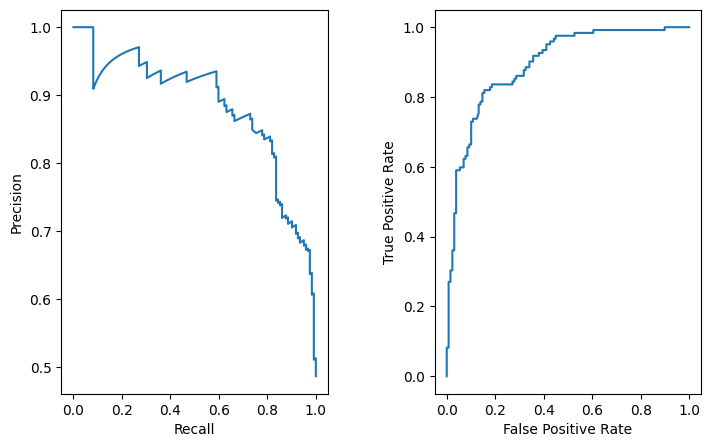

In [112]:
SVM = svm.SVC(probability=True)
s_train_accuracy, s_test_accuracy, s_train_auc, s_test_auc = check_scores(SVM,x_train, x_test, y_train, y_test)

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
forest = RandomForestClassifier(random_state=10)

Train confusion matrix is: 
[[372   0]
 [  0 380]]

Test confusion matrix is: 
[[109  20]
 [ 25  97]]

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       129
           1       0.83      0.80      0.81       122

    accuracy                           0.82       251
   macro avg       0.82      0.82      0.82       251
weighted avg       0.82      0.82      0.82       251


Train accuracy score:  1.0
Test accuracy score:  0.8207171314741036

Train ROC-AUC score:  1.0
Test ROC-AUC score:  0.8978904562206126

Are under Precision-Recall curve: 0.8117154811715481
Area under ROC-AUC: 0.880778393723216


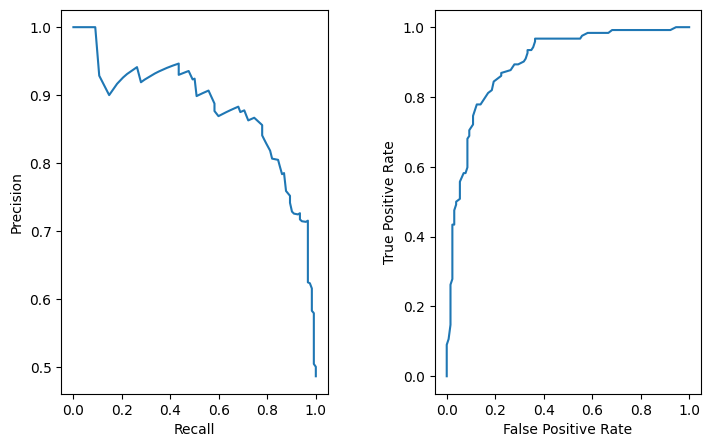

In [116]:
f_train_accuracy, f_test_accuracy, f_train_auc, f_test_auc = check_scores(forest,x_train, x_test, y_train, y_test)

In [117]:
model  = SVM.fit(x_train, y_train)
modelf = forest.fit(x_train, y_train)

In [118]:
var = input("input a review to predict the sentiment: ")
var = remove_emojis(var)
var = remove_custom_punctuation(var)
var = convert_digits_to_words(var)
var = filter_valid_words(var, cs2_terms)
var = ' '.join(var)
var = remove_stopwords(var, custom_stop_words)
var = lemmatize_text_spacy(var)
print(var)

input a review to predict the sentiment:  sometimes that shit hurt


sometimes shit hurt


In [119]:
tes= vectorizer.transform([var])
print(tes)

  (0, 1481)	0.6516627679878904
  (0, 1547)	0.758508824482854


In [120]:
res_svm    = model.predict(tes[0])
res_forest = modelf.predict(tes[0])

if res_svm == 0:
    print("SVM Negative")
else:
    print("SVM Positive")
    
if res_forest == 0:
    print("Forest Negative")
else:
    print("Forest Positive")

SVM Negative
Forest Negative


In [121]:
res_prob_svm = model.predict_proba(tes[0])
res_prob_forest = modelf.predict_proba(tes[0])
print(f"prob svm:{res_prob_svm}")
print(f"prob forest:{res_prob_forest}")

prob svm:[[0.98231552 0.01768448]]
prob forest:[[0.93 0.07]]
